## Time Series Analysis for Role of Statistics in Advancement of AI

Cleaned Dataset (1991-2023):
      Statistics_In_Modern_Technology  Statistical_Methods_In_AI
Year                                                            
1991                              8.0                       12.0
1992                             10.0                       20.0
1993                              9.0                       25.0
1994                             11.0                       29.0
1995                             14.0                       28.0
1996                             12.0                       27.0
1997                             12.0                       37.0
1998                             18.0                       58.0
1999                             21.0                       78.0
2000                             34.0                       67.0
2001                             39.0                       78.0
2002                             56.0                      127.0
2003                             49.0                      13

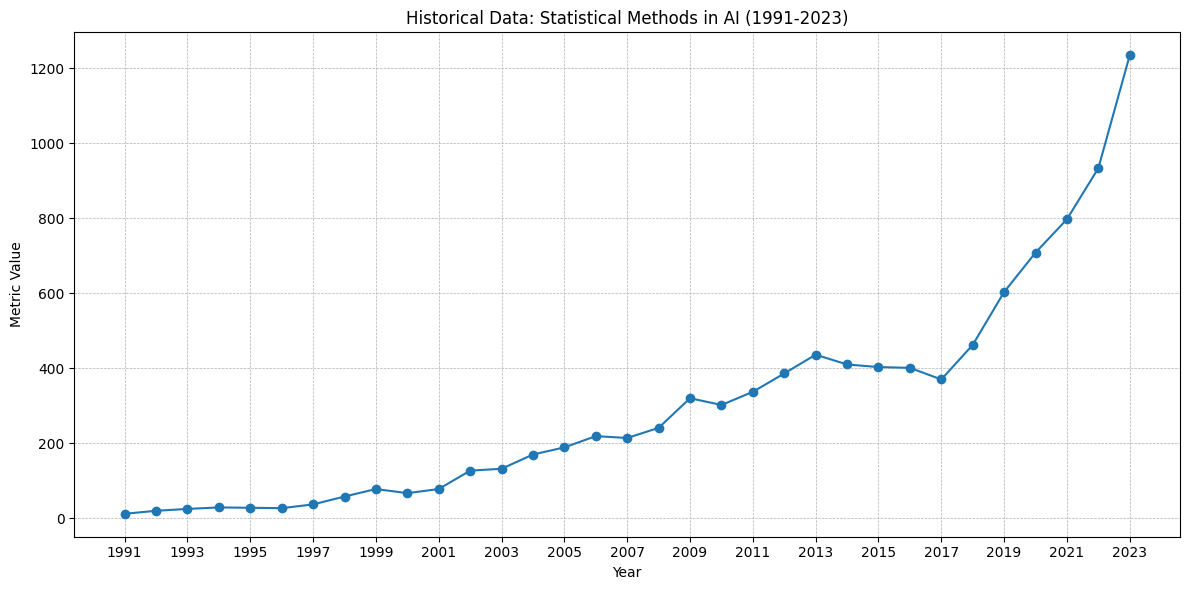

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset from the uploaded CSV file
file_path = "my-analysis-dataset.csv"
df = pd.read_csv(file_path)

# Data Cleansing: Removing rows for 2024 and 2025 as they are not real historical data.
df_historical = df[df['Year'] < 2024].copy()
df_historical['Year'] = df_historical['Year'].astype(int)

# Setting the Year column as the index for time series plotting
df_historical.set_index('Year', inplace=True)

print("Cleaned Dataset (1991-2023):")
print(df_historical)
print(f"\nDataset shape: {df_historical.shape}")

# Plotting the primary target variable: 'Statistical_Methods_In_AI'
plt.figure(figsize=(12, 6))
plt.plot(df_historical.index, df_historical['Statistical_Methods_In_AI'], marker='o', linestyle='-')
plt.title('Historical Data: Statistical Methods in AI (1991-2023)')
plt.xlabel('Year')
plt.ylabel('Metric Value')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(df_historical.index[::2]) # Show every other year to avoid clutter
plt.tight_layout()
plt.show()

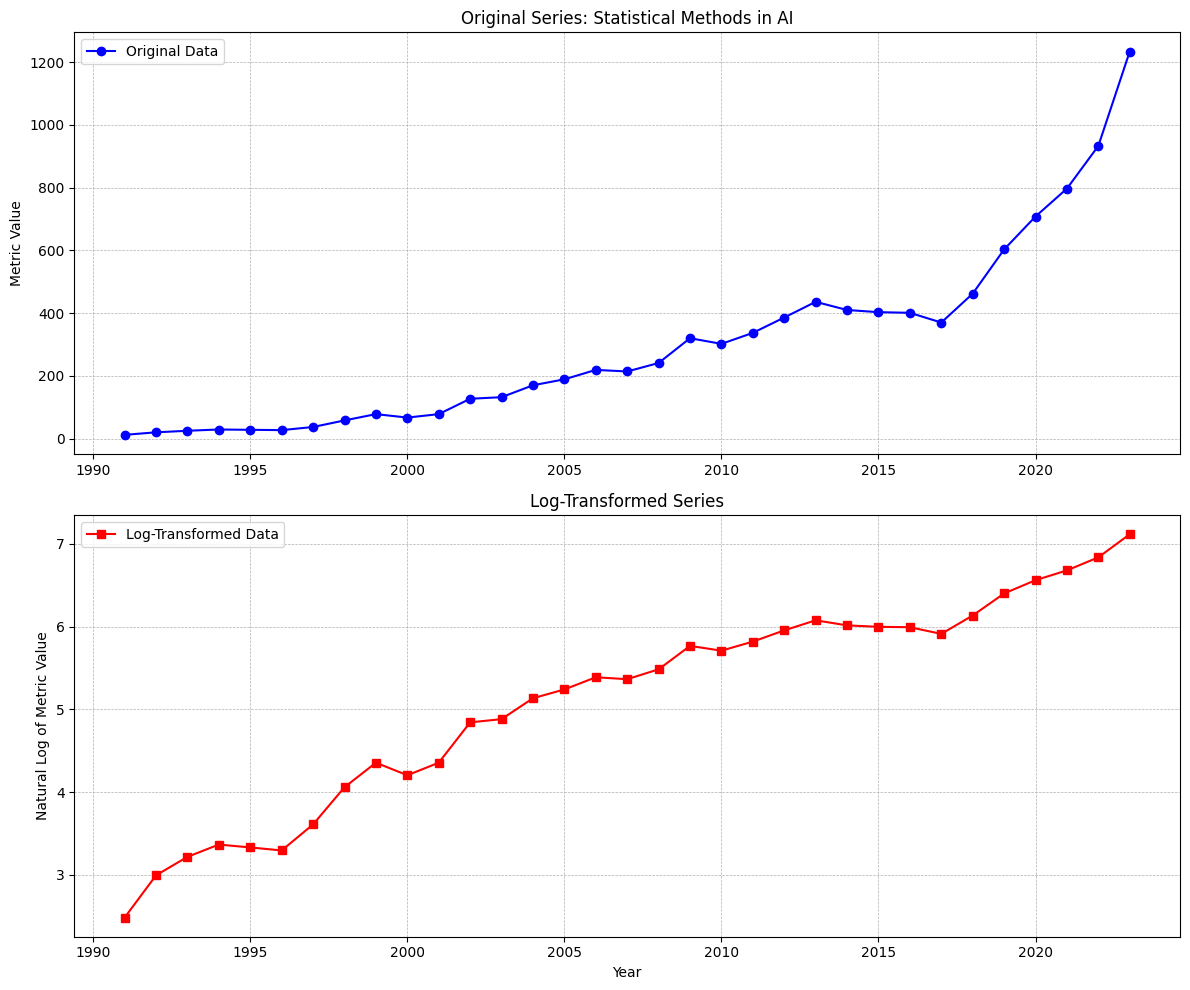


DataFrame with new log-transformed column:
<bound method NDFrame.tail of       Statistical_Methods_In_AI  log_Statistical_AI
Year                                               
1991                       12.0            2.484907
1992                       20.0            2.995732
1993                       25.0            3.218876
1994                       29.0            3.367296
1995                       28.0            3.332205
1996                       27.0            3.295837
1997                       37.0            3.610918
1998                       58.0            4.060443
1999                       78.0            4.356709
2000                       67.0            4.204693
2001                       78.0            4.356709
2002                      127.0            4.844187
2003                      132.0            4.882802
2004                      170.0            5.135798
2005                      189.0            5.241747
2006                      219.0           

In [11]:
# 1. Applying the natural log transformation to the target variable
# We use np.log() for the natural logarithm
df_historical['log_Statistical_AI'] = np.log(df_historical['Statistical_Methods_In_AI'])

# 2. Ploting both the original and the transformed series to see the effect
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Original Series
ax1.plot(df_historical.index, df_historical['Statistical_Methods_In_AI'], marker='o', color='blue', label='Original Data')
ax1.set_title('Original Series: Statistical Methods in AI')
ax1.set_ylabel('Metric Value')
ax1.grid(True, linestyle='--', linewidth=0.5)
ax1.legend()
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%d')) # Format years

# Plot 2: Log-Transformed Series
ax2.plot(df_historical.index, df_historical['log_Statistical_AI'], marker='s', color='red', label='Log-Transformed Data')
ax2.set_title('Log-Transformed Series')
ax2.set_xlabel('Year')
ax2.set_ylabel('Natural Log of Metric Value')
ax2.grid(True, linestyle='--', linewidth=0.5)
ax2.legend()
ax2.xaxis.set_major_formatter(plt.FormatStrFormatter('%d')) # Format years

plt.tight_layout()
plt.show()

# 3. Inspecting the new column in the DataFrame
print("\nDataFrame with new log-transformed column:")
print(df_historical[['Statistical_Methods_In_AI', 'log_Statistical_AI']].tail)

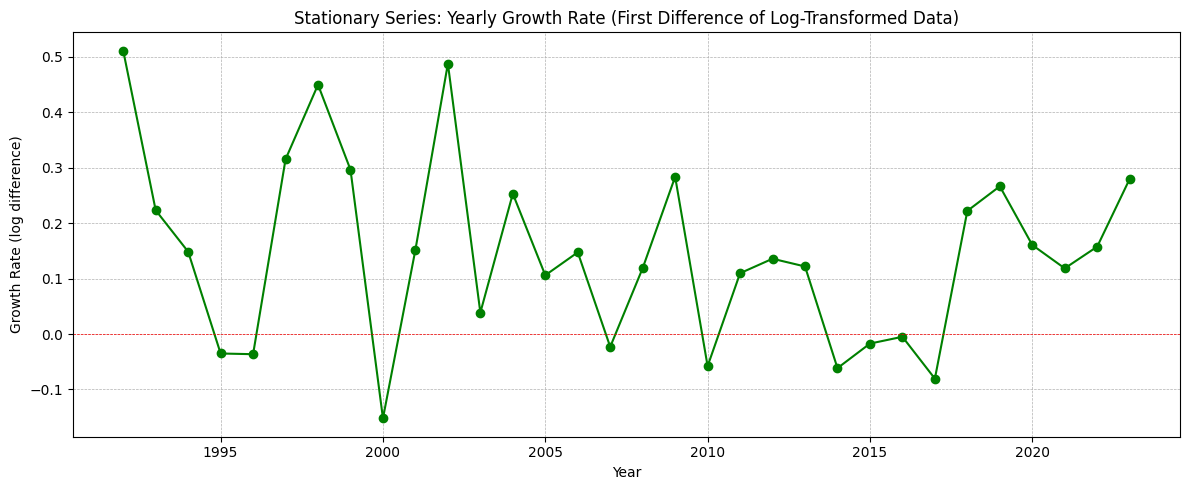


DataFrame with Growth Rate column:
<bound method NDFrame.tail of       log_Statistical_AI  log_diff_Statistical_AI
Year                                             
1991              2.4849                      NaN
1992              2.9957                   0.5108
1993              3.2189                   0.2231
1994              3.3673                   0.1484
1995              3.3322                  -0.0351
1996              3.2958                  -0.0364
1997              3.6109                   0.3151
1998              4.0604                   0.4495
1999              4.3567                   0.2963
2000              4.2047                  -0.1520
2001              4.3567                   0.1520
2002              4.8442                   0.4875
2003              4.8828                   0.0386
2004              5.1358                   0.2530
2005              5.2417                   0.1059
2006              5.3891                   0.1473
2007              5.3660          

In [12]:
# 1. Creating the first-difference of the log-transformed series
# The .diff() method calculates the difference between a value and the value before it.
df_historical['log_diff_Statistical_AI'] = df_historical['log_Statistical_AI'].diff()

# 2. Plotting the new stationary series
plt.figure(figsize=(12, 5))
plt.plot(df_historical.index, df_historical['log_diff_Statistical_AI'], marker='o', color='green')
plt.title('Stationary Series: Yearly Growth Rate (First Difference of Log-Transformed Data)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (log difference)')
plt.axhline(y=0, color='r', linestyle='--', linewidth=0.5) # Add a horizontal line at zero
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d')) # Format years as integers
plt.tight_layout()
plt.show()

# 3. Inspecting the new column. The first row will be NaN because there is no prior value to difference with.
print("\nDataFrame with Growth Rate column:")
with pd.option_context('display.float_format', '{:.4f}'.format):
    print(df_historical[['log_Statistical_AI', 'log_diff_Statistical_AI']].tail)

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF of the STATIONARY series: log_diff_Statistical_AI, with NaN values dropped
stationary_series = df_features['log_diff_Statistical_AI']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(stationary_series, lags=10, ax=ax1, title='Autocorrelation Function (ACF)')
plot_pacf(stationary_series, lags=10, ax=ax2, title='Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

NameError: name 'df_features' is not defined

In [13]:
# 1. Creating Lagged Features
# We will create features using the past values of the GROWTH RATE (log_diff_Statistical_AI)
lags = 3  # Let's start with 3 lags, as suggested by our earlier analysis.
for lag in range(1, lags+1):
    lag_col_name = f'lag_{lag}'
    df_historical[lag_col_name] = df_historical['log_diff_Statistical_AI'].shift(lag)

# 2. Creating a Time Index feature
# This helps the model understand the underlying long-term trend in the growth rate.
df_historical['years_since_start'] = df_historical.index - df_historical.index.min()

# 3. Creating Rolling Statistics (using a 3-year window)
df_historical['rolling_mean_3'] = df_historical['log_diff_Statistical_AI'].rolling(window=3, min_periods=1).mean()
df_historical['rolling_std_3'] = df_historical['log_diff_Statistical_AI'].rolling(window=3, min_periods=1).std()

# 4. Inspecting the final engineered DataFrame
# We will drop the first 3 rows to avoid NaN values from lagging and rolling.
df_features = df_historical.dropna().copy()
print("\nFinal DataFrame with Engineered Features:")
with pd.option_context('display.float_format', '{:.4f}'.format):
    print(df_features)

print(f"\nFinal DataFrame shape for modeling: {df_features.shape}")


Final DataFrame with Engineered Features:
      Statistics_In_Modern_Technology  Statistical_Methods_In_AI  \
Year                                                               
1995                          14.0000                    28.0000   
1996                          12.0000                    27.0000   
1997                          12.0000                    37.0000   
1998                          18.0000                    58.0000   
1999                          21.0000                    78.0000   
2000                          34.0000                    67.0000   
2001                          39.0000                    78.0000   
2002                          56.0000                   127.0000   
2003                          49.0000                   132.0000   
2004                          72.0000                   170.0000   
2005                          81.0000                   189.0000   
2006                          74.0000                   219.0000   
2007 

In [14]:
from sklearn.model_selection import train_test_split

# 1. Defining the Target (y) and Features (X)
y = df_features['log_diff_Statistical_AI'] # We want to predict the growth rate
X = df_features[['lag_1', 'lag_2', 'lag_3', 'years_since_start', 'rolling_mean_3', 'rolling_std_3']] 
# Using these features to predict it

# 2. Performing a TEMPORAL Train-Test Split
# Holding out the last 7 years (2017-2023) for testing.
# This tests the model's ability to forecast into the "future".
test_size = 7
X_train = X.iloc[:-test_size]
y_train = y.iloc[:-test_size]

X_test = X.iloc[-test_size:]
y_test = y.iloc[-test_size:]

# 3. Inspecting the shapes of the resulting sets
print("Training Set Shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print("\nTest Set Shapes:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

print("\nTraining Years:", X_train.index.min(), "to", X_train.index.max())
print("Test Years:    ", X_test.index.min(), "to", X_test.index.max())

Training Set Shapes:
X_train: (22, 6), y_train: (22,)

Test Set Shapes:
X_test: (7, 6), y_test: (7,)

Training Years: 1995 to 2016
Test Years:     2017 to 2023


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Creating and training the Random Forest model
# We set random_state=42 to ensure we get the same results every time we run this code.
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 2. Checking the model's performance on the TRAINING data (for initial diagnosis)
y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Model Performance on Training Data (1995-2016):")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.4f}")
print("\n(These metrics are for predicting the 'growth rate' on the data the model was trained on.)")

# 3. Checking the model's performance on the TEST data (the real test)
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n" + "="*50)
print("Model Performance on Unseen Test Data (2017-2023):")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print("\nThis is the key evaluation. How well does it forecast the future?")

Model Performance on Training Data (1995-2016):
Mean Absolute Error (MAE): 0.0487
Root Mean Squared Error (RMSE): 0.0594

(These metrics are for predicting the 'growth rate' on the data the model was trained on.)

Model Performance on Unseen Test Data (2017-2023):
Mean Absolute Error (MAE): 0.1020
Root Mean Squared Error (RMSE): 0.1173

This is the key evaluation. How well does it forecast the future?


Forecast Performance on Test Period (2017-2023):
      Actual_Growth_Rate  Predicted_Growth_Rate   Error
Year                                                   
2017             -0.0805                 0.0919 -0.1723
2018              0.2221                 0.1658  0.0563
2019              0.2664                 0.1924  0.0739
2020              0.1605                 0.0808  0.0797
2021              0.1184                 0.0740  0.0444
2022              0.1576                 0.0781  0.0795
2023              0.2796                 0.0715  0.2081


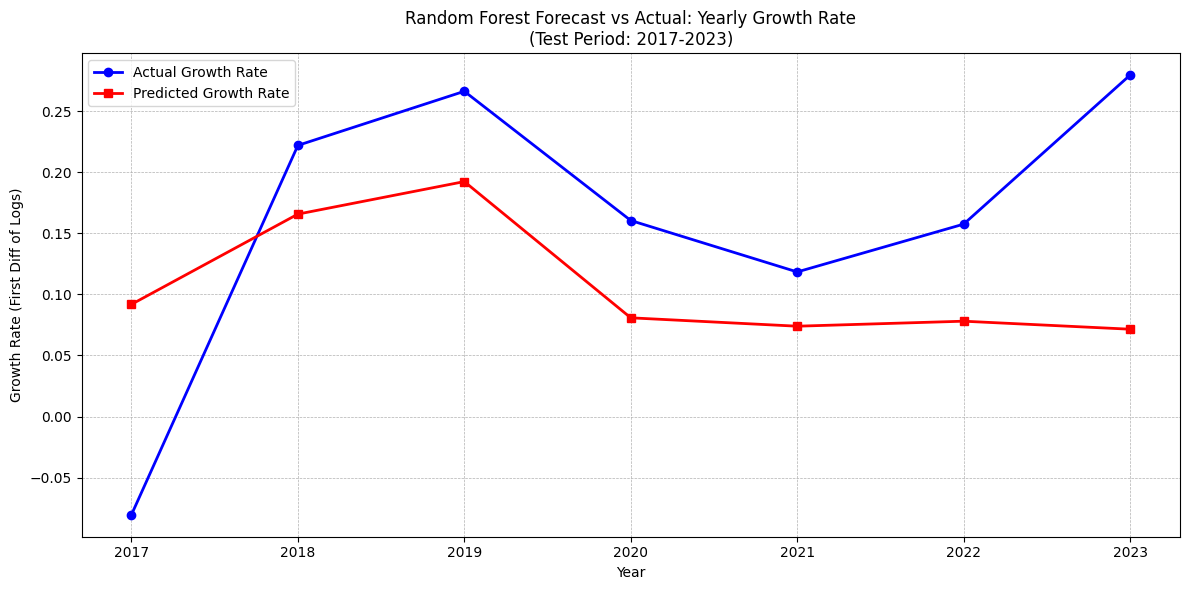

In [16]:
# 1. Creating a DataFrame to compare actual vs predicted growth rates for the test period
results_test = pd.DataFrame({
    'Year': y_test.index,
    'Actual_Growth_Rate': y_test.values,
    'Predicted_Growth_Rate': y_test_pred
}).set_index('Year')

# 2. Calculating the error for each forecast
results_test['Error'] = results_test['Actual_Growth_Rate'] - results_test['Predicted_Growth_Rate']

# 3. Printing the results
print("Forecast Performance on Test Period (2017-2023):")
with pd.option_context('display.float_format', '{:.4f}'.format):
    print(results_test)

# 4. Plotting the comparison
plt.figure(figsize=(12, 6))
plt.plot(results_test.index, results_test['Actual_Growth_Rate'], marker='o', color='blue', 
         linewidth=2, label='Actual Growth Rate')
plt.plot(results_test.index, results_test['Predicted_Growth_Rate'], marker='s', color='red', 
         linewidth=2, label='Predicted Growth Rate')
plt.title('Random Forest Forecast vs Actual: Yearly Growth Rate\n(Test Period: 2017-2023)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (First Diff of Logs)')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.tight_layout()
plt.show()

Final Forecast of Yearly Growth Rates (2024-2050):
      Predicted_Growth_Rate
Year                       
2024                 0.2243
2025                 0.1560
2026                 0.1687
2027                 0.1403
2028                 0.1685
2029                 0.1578
2030                 0.1667
2031                 0.1649
2032                 0.1661
2033                 0.1649


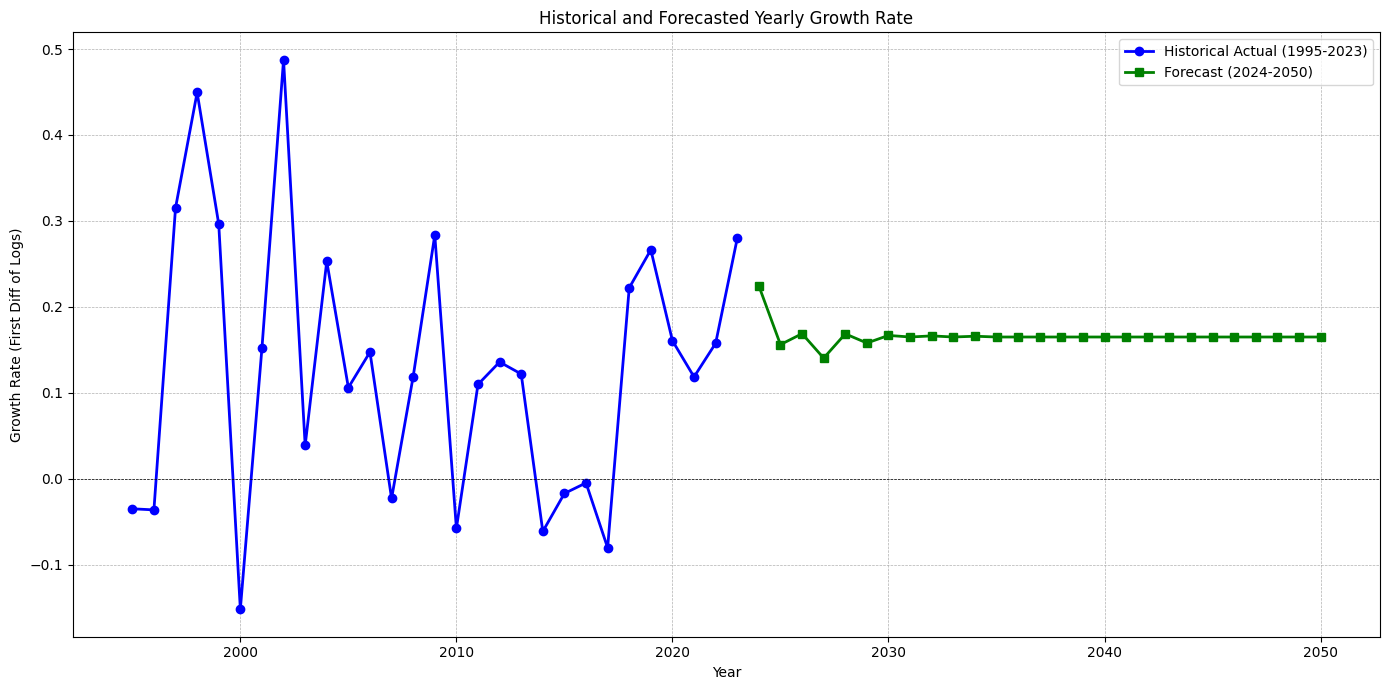

In [17]:
# 1. Retraining the final model on the entire dataset (1995-2023)
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X, y) # Using X and y from our full feature set (1995-2023)

# 2. Preparing for recursive forecasting
# We need the last few known years to create features for the first forecast (2024)
last_known_index = df_features.index[-1] # This is 2023
forecast_horizon = 2050 - 2024 + 1 # Number of years to forecast (2024 to 2050 inclusive)

# Creating a list to store our future growth rate predictions
future_growth_predictions = []

# Getting the last row of our feature set to bootstrap the first forecast
last_row = X.iloc[-1:].copy() # This is the feature vector for 2023

# 3. Recursive forecasting loop
for year_ahead in range(1, forecast_horizon + 1):
    # Predicting the growth rate for the next year (e.g., 2024)
    next_growth = final_model.predict(last_row)[0]
    future_growth_predictions.append(next_growth)
    
    # Now we update the 'last_row' feature vector for the NEXT prediction
    # The new 'lag_1' becomes the growth we just predicted
    # The old 'lag_1' becomes the new 'lag_2', and so on.
    last_row['lag_3'] = last_row['lag_2'].values
    last_row['lag_2'] = last_row['lag_1'].values
    last_row['lag_1'] = next_growth
    
    # Updating the rolling statistics (this is a simplified approximation)
    last_row['rolling_mean_3'] = (last_row['lag_1'] + last_row['lag_2'] + last_row['lag_3']) / 3
    last_row['rolling_std_3'] = np.std([last_row['lag_1'], last_row['lag_2'], last_row['lag_3']])
    
    # The time index increases by one year
    last_row['years_since_start'] += 1

# 4. Creating a DataFrame for the future forecasts
future_years = pd.RangeIndex(start=2024, stop=2051, step=1) # Years 2024 to 2050
future_forecast_df = pd.DataFrame({
    'Year': future_years,
    'Predicted_Growth_Rate': future_growth_predictions
}).set_index('Year')

print("Final Forecast of Yearly Growth Rates (2024-2050):")
with pd.option_context('display.float_format', '{:.4f}'.format):
    print(future_forecast_df.head(10)) # Display first 10 years of the forecast

# 5. Plotting the historical and forecasted growth rates
plt.figure(figsize=(14, 7))
# Plot historical growth rate
plt.plot(y.index, y.values, marker='o', color='blue', linewidth=2, label='Historical Actual (1995-2023)')
# Plot forecasted growth rate
plt.plot(future_forecast_df.index, future_forecast_df['Predicted_Growth_Rate'], marker='s', color='green', linewidth=2, 
         label='Forecast (2024-2050)')
plt.title('Historical and Forecasted Yearly Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate (First Diff of Logs)')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.tight_layout()
plt.show()

Last known value (2023): 1234

Final Forecast for 'Statistical_Methods_In_AI' (2023-2030):
      Forecast_Statistical_AI
Year                         
2023                    1,234
2024                    1,544
2025                    1,805
2026                    2,137
2027                    2,459
2028                    2,910
2029                    3,408
2030                    4,026


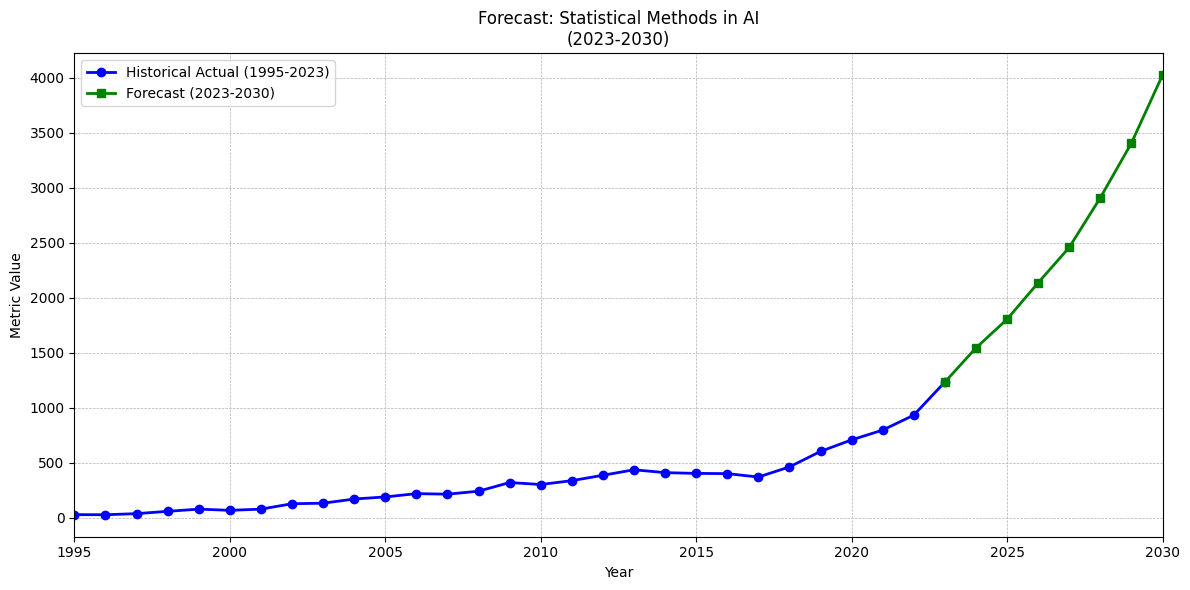

In [21]:
# 1. Getting the last known LOG value (for 2023)
last_known_log_value = df_historical.loc[2023, 'log_Statistical_AI']
last_known_original_value = df_historical.loc[2023, 'Statistical_Methods_In_AI']
print(f"Last known value (2023): {last_known_original_value:.0f}")

# 2. Creating lists to store the integrated forecasts
future_log_values = [last_known_log_value] # Start with the last known log value
future_original_values = [last_known_original_value] # Start with the last known original value

# 3. Integrating the forecasted growth rates
# For each predicted growth rate, add it to the previous log value to get the new log value
for growth_rate in future_growth_predictions:
    next_log_val = future_log_values[-1] + growth_rate
    future_log_values.append(next_log_val)
    # Reversing the log transformation to get the forecast in the original scale
    next_original_val = np.exp(next_log_val)
    future_original_values.append(next_original_val)

# 4. Creating the final forecast DataFrame (2023-2030 only)
# Ensure we only take the number of values that match our desired timeframe
num_years = 2030 - 2023 + 1  # 8 years: 2023-2030 inclusive
future_original_values_trimmed = future_original_values[:num_years]

forecast_years = pd.RangeIndex(start=2023, stop=2031, step=1) # From 2023 to 2030
final_forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'Forecast_Statistical_AI': future_original_values_trimmed
}).set_index('Year')

# The first row (2023) is the actual historical data, the rest are forecasts
print("\nFinal Forecast for 'Statistical_Methods_In_AI' (2023-2030):")
# Displaying the forecast with integers for the years and commas for large numbers
with pd.option_context('display.float_format', '{:,.0f}'.format):
    print(final_forecast_df) # Show all years from 2023 to 2030

# 5. Plotting the recent historical data and the short-term forecast
plt.figure(figsize=(12, 6))
# Plot of the recent historical data (last 10 years for context)
start_year = max(1995, df_historical.index.min())  # Show last 10 years of historical data
historical_recent = df_historical[df_historical.index >= start_year]

plt.plot(historical_recent.index, historical_recent['Statistical_Methods_In_AI'], marker='o', color='blue', 
         linewidth=2, label=f'Historical Actual ({start_year}-2023)')
# Plot of the forecast
plt.plot(final_forecast_df.index, final_forecast_df['Forecast_Statistical_AI'], marker='s', color='green', 
         linewidth=2, label='Forecast (2023-2030)')
plt.title('Forecast: Statistical Methods in AI\n(2023-2030)')
plt.xlabel('Year')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
# Set x-axis limits to focus on 2023-2030 with some context
plt.xlim(start_year, 2030)
plt.tight_layout()
plt.show()